<a href="https://colab.research.google.com/github/Hansastro/Covid-19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid-19 Graphs**

Source:
[ecdc Coronavirus information](https://www.ecdc.europa.eu/en/novel-coronavirus-china)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
from datetime import date, timedelta

%matplotlib inline

List of the country to display and a start date

In [0]:
countryList = [
               'Germany',
               'France',
               'Italy',
               'Denmark',
               'United_States_of_America',
               'United_Kingdom',
               'Spain',
               'South_Korea',
               'China',
               'Iran'
              ]
#countryList = ['China']

startDate = '03/01/2020'

The script will try to download the file of the day. If the file is not available, it will try to download the one of yesterday.

In [47]:
#Download the dataset

url = 'https://www.ecdc.europa.eu/sites/default/files/documents/'
dataset_file_root = r'COVID-19-geographic-disbtribution-worldwide-'

today = date.today()
dataset_file = dataset_file_root + today.strftime('%Y-%m-%d') + '.xlsx'

# Try to find the file for today
try:
  print('Download the data of today ({})...'.format(today.strftime('%Y-%m-%d')))
  df = pd.read_excel(url + dataset_file)
except urllib.error.HTTPError:
  # If exception try the file of yesterday
  print('File for today ({}) not found. Trying to open the file of yesterday'.format(today.strftime('%Y-%m-%d')))
  yesterday = today - timedelta(days=1)
  dataset_file = dataset_file_root + yesterday.strftime('%Y-%m-%d') + '.xlsx'
  try:
    print('Download the data of yesterday ({})...'.format(yesterday.strftime('%Y-%m-%d')))
    df = pd.read_excel(url + dataset_file)
  except urllib.error.HTTPError:
    print('No File not available for {} and {}...'.format(today.strftime('%Y-%m-%d'), yesterday.strftime('%Y-%m-%d')))
    df = None

# convert the date in date format
df['dateRep'] = pd.to_datetime(df['dateRep'])
df.sort_values(by=['countriesAndTerritories', 'dateRep'], inplace=True)

Download the data of today (2020-03-30)...
File for today (2020-03-30) not found. Trying to open the file of yesterday
Download the data of yesterday (2020-03-29)...


In [0]:
df2['totalCases'] = df.groupby(by=['countriesAndTerritories'])['cases'].apply(lambda x: x.cumsum())
df2['totalDeaths'] = df.groupby(by=['countriesAndTerritories'])['deaths'].apply(lambda x: x.cumsum())


In [62]:
df2.loc[df2['countriesAndTerritories'] == 'France']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,totalCases,totalDeath,totalDeaths
2542,2019-12-31,31,12,2019,0,0,France,FR,FRA,66987244.0,0,0,0
2541,2020-01-01,1,1,2020,0,0,France,FR,FRA,66987244.0,0,0,0
2540,2020-01-02,2,1,2020,0,0,France,FR,FRA,66987244.0,0,0,0
2539,2020-01-03,3,1,2020,0,0,France,FR,FRA,66987244.0,0,0,0
2538,2020-01-04,4,1,2020,0,0,France,FR,FRA,66987244.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2020-03-25,25,3,2020,2446,240,France,FR,FRA,66987244.0,22302,1100,1100
2456,2020-03-26,26,3,2020,2931,231,France,FR,FRA,66987244.0,25233,1331,1331
2455,2020-03-27,27,3,2020,3922,365,France,FR,FRA,66987244.0,29155,1696,1696
2454,2020-03-28,28,3,2020,3809,299,France,FR,FRA,66987244.0,32964,1995,1995


In [67]:
df2['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria',
       'Burkina_Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Fin

ERROR! Session/line number was not unique in database. History logging moved to new session 59


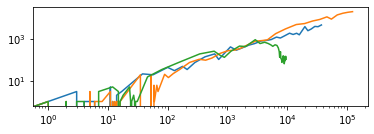

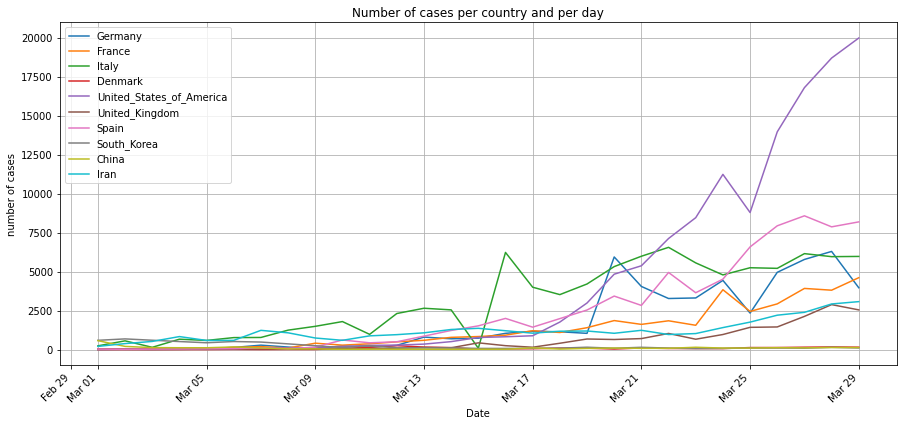

In [104]:
# Make the curve of the amount of infected people per day

# Old version
#if df is not None:
#  fig, ax = plt.subplots(figsize=(15,7))
#
#  for c in countryList:
#      ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
#               df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewConfCases']])
#  ax.set_title('Number of cases per country and per day')
#  ax.set_xlabel('Date')
#  ax.set_ylabel('number of cases')
#  ax.grid(True)
#  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#  ax.legend(countryList)
#  fig.autofmt_xdate(rotation=45)
#  fig.show()

if df is not None:
  fig, ax = plt.subplots(figsize=(15,7))

  for c in countryList:
      ax.plot(df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['dateRep']], \
               df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['cases']])
  ax.set_title('Number of cases per country and per day')
  ax.set_xlabel('Date')
  ax.set_ylabel('number of cases')
  ax.grid(True)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  ax.legend(countryList)
  fig.autofmt_xdate(rotation=45)
  fig.show()

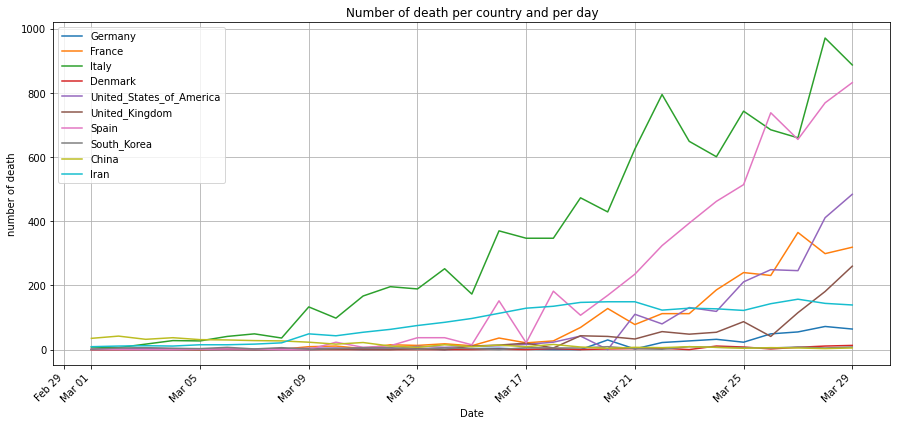

In [85]:
# Make the curve of the death per day

# Old version
#if df is not None:
#  fig, ax = plt.subplots(figsize=(15,7))
#
#  for c in countryList:
#      ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
#              df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewDeaths']])
#  ax.set_title('Number of cases per country and per day')
#  ax.set_xlabel('Date')
#  ax.set_ylabel('number of cases')
#  ax.grid(True)
#  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#  ax.legend(countryList)
#  fig.autofmt_xdate(rotation=45)
#  fig.show()

if df is not None:
  fig, ax = plt.subplots(figsize=(15,7))

  for c in countryList:
      ax.plot(df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['dateRep']], \
              df.loc[(df['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate), ['deaths']])
  ax.set_title('Number of death per country and per day')
  ax.set_xlabel('Date')
  ax.set_ylabel('number of death')
  ax.grid(True)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  ax.legend(countryList)
  fig.autofmt_xdate(rotation=45)
  fig.show()

<Figure size 432x288 with 0 Axes>

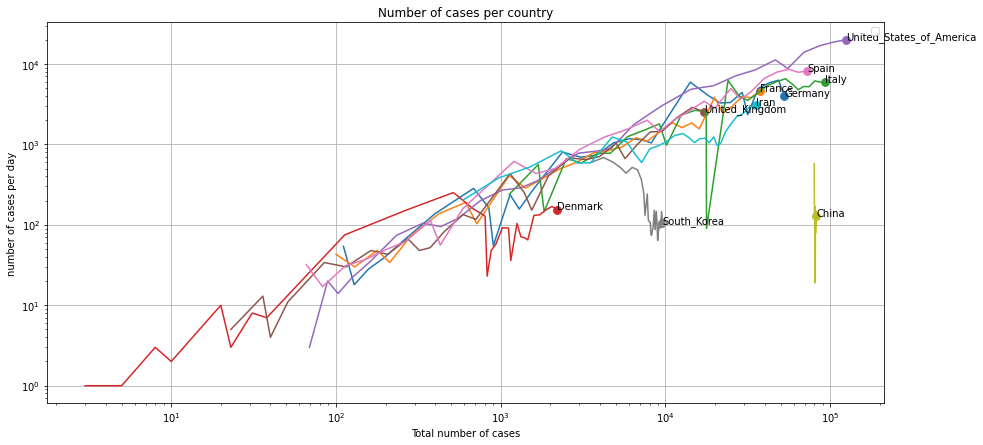

In [103]:
fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Number of cases per country')
ax.set_xlabel('Total number of cases')
ax.set_ylabel('number of cases per day')
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(countryList)

for c in countryList:
  df3 = df2.loc[(df2['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate)]
  ax.plot(df3['totalCases'], df3['cases'])
  totalCases = df3.iloc[-1]['totalCases']
  cases =  df3.iloc[-1]['cases']
  ax.scatter(totalCases, cases, s=60)
  ax.annotate(xy=[totalCases, cases], s=c)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

<Figure size 432x288 with 0 Axes>

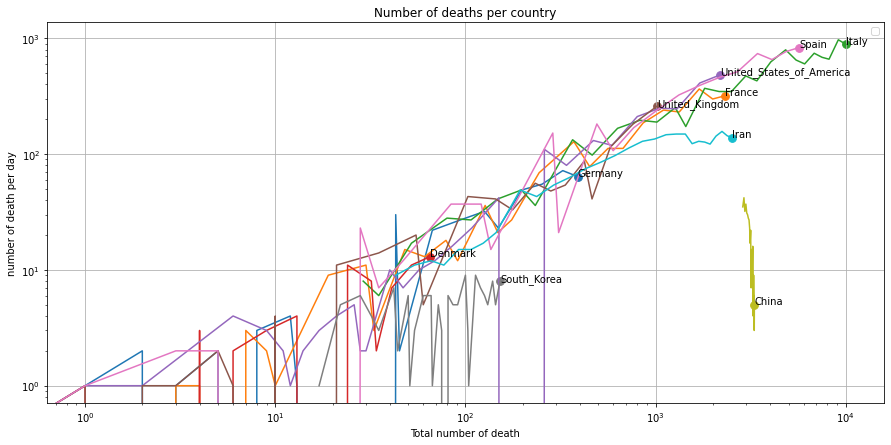

In [106]:
fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Number of deaths per country')
ax.set_xlabel('Total number of death')
ax.set_ylabel('number of death per day')
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(countryList)

for c in countryList:
  df3 = df2.loc[(df2['countriesAndTerritories'] == c) & (df['dateRep'] >= startDate)]
  ax.plot(df3['totalDeaths'], df3['deaths'])
  totalCases = df3.iloc[-1]['totalDeaths']
  cases =  df3.iloc[-1]['deaths']
  ax.scatter(totalCases, cases, s=60)
  ax.annotate(xy=[totalCases, cases], s=c)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()